## Train and Prediction on all data

Using rotated to hz + OpenCv border

Basic default transforms

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join

In [3]:
torch.cuda.set_device(2)
torch.cuda.current_device()

2

In [4]:
data_dir = Path('data')
data_04 = Path('data_04')

In [5]:
MODEL_NAME='bg_const'

In [6]:
NB_NUM='03_27'

In [7]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: 9cee3e20, DATE: 20191130


In [8]:
DATE = '20191130'
UID = '9cee3e20'

In [9]:
SUB_NUM='30'

In [10]:
img_size=256
bs=128
background='constant'

In [11]:
train_images=data_04/f'train/rotated/clipped/constant/{img_size}'
test_images=data_04/f'test/rotated/clipped/constant/{img_size}'

In [12]:
train_names = get_image_files(train_images)

In [13]:
test_names = get_image_files(test_images)

### using valid + gold preds instead of all

In [14]:
df_gold=pd.read_csv(data_dir/'df_all_repl_st_lucia_castries_gold_concrete_cement.csv')

In [15]:
df_gold.drop(columns=['target'],inplace=True)

In [16]:
df_gold=df_gold[['id','roof_material','verified','country','region']]

In [17]:
df_gold.tail()

,id,roof_material,verified,country,region
22534,7a3585be,concrete_cement,True,st_lucia,castries
22535,7a1d3324,concrete_cement,True,st_lucia,castries
22536,7a30849c,concrete_cement,True,st_lucia,castries
22537,7a27186c,concrete_cement,True,st_lucia,castries
22538,7a34ef78,concrete_cement,True,st_lucia,castries


In [18]:
df_pewter_70pct=pd.read_csv(data_dir/'st_lucia_castries_gros_islet_70pct_rn50-rn152-dn121_preds.csv')

In [19]:
df_pewter_70pct.tail()

,id,roof_material,verified,country,region
3364,7a3a5eea,other,True,st_lucia,gros_islet
3365,7a3b3dce,other,True,st_lucia,castries
3366,7a3cfda8,other,True,st_lucia,gros_islet
3367,7a42d1a6,other,True,st_lucia,gros_islet
3368,7a4494c8,other,True,st_lucia,gros_islet


In [20]:
frames = [df_gold, df_pewter_70pct]

df_gold_pewter = pd.concat(frames)

In [21]:
#### test data

In [22]:
df_test=pd.read_csv(data_dir/'df_test_all.csv')

In [23]:
df_test.tail()

,id,country,region
7320,7a4f3ff4,st_lucia,dennery
7321,7a4fc578,st_lucia,dennery
7322,7a4ac7b2,st_lucia,dennery
7323,7a47e25e,st_lucia,dennery
7324,7a4e3f78,st_lucia,dennery


In [24]:
assert len(df_test)==7325

In [25]:
gp_ids=df_gold_pewter.id.values.tolist()

In [26]:
train_names[0:10]

[PosixPath('data_04/train/rotated/clipped/constant/256/7a1fa6f4_256_bgconstant.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a208484_raw.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a1ea402_raw.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a3a560c_raw.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a2fc61a_raw.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a2fd3bc_256_bgconstant.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a25c764_raw.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a1ccf9c_raw.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a2c4058_256_bgconstant.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a31bba0_256_bgconstant.tif')]

In [27]:
trn_file_names=[]
for f in train_names:
    trn_file_names.append(f.name.split('.tif')[0])

In [28]:
trn_file_names[0:10]

['7a1fa6f4_256_bgconstant',
 '7a208484_raw',
 '7a1ea402_raw',
 '7a3a560c_raw',
 '7a2fc61a_raw',
 '7a2fd3bc_256_bgconstant',
 '7a25c764_raw',
 '7a1ccf9c_raw',
 '7a2c4058_256_bgconstant',
 '7a31bba0_256_bgconstant']

In [29]:
bg_const_names=[]
for f in trn_file_names:
    if '_256_bgconstant' in f:
        bg_const_names.append(f.split('_256_bgconstant')[0])
        
raw_names=[]
for f in trn_file_names:
    if '_raw' in f:
        raw_names.append(f.split('_raw')[0])
        
zoom_names=[]
for f in trn_file_names:
    if '_zoom' in f:
        zoom_names.append(f.split('_zoom')[0])

In [30]:
df_gold_pewter_bg_const=df_gold_pewter.loc[df_gold_pewter['id'].isin(bg_const_names)]

In [31]:
df_gold_pewter_bg_const['id']=df_gold_pewter_bg_const['id']+'_256_bgconstant'

In [32]:
df_gold_pewter_bg_const.head()

,id,roof_material,verified,country,region
0,7a3f2a10_256_bgconstant,concrete_cement,True,colombia,borde_rural
1,7a1f731e_256_bgconstant,irregular_metal,True,colombia,borde_rural
2,7a424ad8_256_bgconstant,healthy_metal,True,colombia,borde_rural
3,7a3edc5e_256_bgconstant,healthy_metal,True,colombia,borde_rural
4,7a303a6e_256_bgconstant,healthy_metal,True,colombia,borde_rural


In [33]:
df_gold_pewter_bg_const=df_gold_pewter_bg_const.drop_duplicates(subset=['id'])

Ensure is only ids with _256_bgconstant

In [34]:
len(bg_const_names)

22553

In [35]:
#### raw

In [36]:
len(raw_names)

22553

In [37]:
df_gold_pewter_raw=df_gold_pewter.loc[df_gold_pewter['id'].isin(raw_names)]

In [38]:
df_gold_pewter_raw['id']=df_gold_pewter_raw['id']+'_raw'

In [39]:
df_gold_pewter_raw.head()

,id,roof_material,verified,country,region
0,7a3f2a10_raw,concrete_cement,True,colombia,borde_rural
1,7a1f731e_raw,irregular_metal,True,colombia,borde_rural
2,7a424ad8_raw,healthy_metal,True,colombia,borde_rural
3,7a3edc5e_raw,healthy_metal,True,colombia,borde_rural
4,7a303a6e_raw,healthy_metal,True,colombia,borde_rural


In [40]:
len(df_gold_pewter_raw)

25908

In [41]:
df_gold_pewter_raw=df_gold_pewter_raw.drop_duplicates(subset=['id'])

In [42]:
#### zoom

In [43]:
len(zoom_names)

861

In [44]:
df_gold_pewter_zoom=df_gold_pewter.loc[df_gold_pewter['id'].isin(zoom_names)]

In [45]:
df_gold_pewter_zoom['id']=df_gold_pewter_zoom['id']+'_zoom'

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_gold_pewter_zoom.head()

,id,roof_material,verified,country,region
64,7a42454c_zoom,concrete_cement,True,colombia,borde_rural
73,7a41a984_zoom,irregular_metal,True,colombia,borde_rural
184,7a34bb84_zoom,irregular_metal,True,colombia,borde_rural
185,7a38e4fc_zoom,concrete_cement,True,colombia,borde_rural
196,7a3ae3b0_zoom,irregular_metal,True,colombia,borde_rural


In [47]:
len(df_gold_pewter_zoom)

962

In [48]:
df_gold_pewter_zoom=df_gold_pewter_zoom.drop_duplicates(subset=['id'])

In [49]:
len(df_gold_pewter_zoom)

860

append them all

In [50]:
frames = [df_gold_pewter_bg_const, df_gold_pewter_raw, df_gold_pewter_zoom]

df_gold_pewter = pd.concat(frames)

In [74]:
len(df_gold_pewter)

45938

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [51]:
xtra_tfms=[rand_crop(p=0.4), rand_zoom(scale=(1.,1.5),p=0.4)]
tfms = get_transforms(flip_vert=True, max_lighting=0.25, max_warp=0., xtra_tfms=xtra_tfms)

### setup dataset

In [52]:
np.random.seed(42)
dep_var='roof_material'
src = (ImageList.from_df(path=train_images, df=df_gold_pewter, cols='id', suffix='.tif')
       .split_by_rand_pct(0.1)
      .label_from_df(cols=dep_var)
      .add_test_folder(test_images))

45938


In [53]:
data = (src.transform(tfms, size=img_size)
        .databunch(bs=bs).normalize(imagenet_stats))

In [54]:
#to check what params object has
#dir(data)

In [55]:
data.label_list

LabelLists;

Train: LabelList (41345 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Valid: LabelList (4593 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,irregular_metal,healthy_metal,irregular_metal
Path: data_04/train/rotated/clipped/constant/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data_04/train/rotated/clipped/constant/256

In [56]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

`show_batch` still works, and show us the different labels separated by `;`.

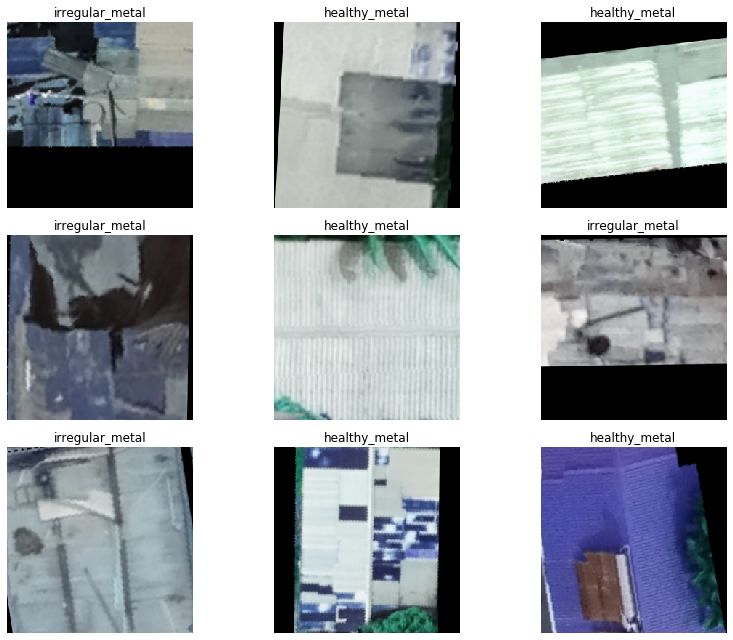

In [57]:
data.show_batch(rows=3, figsize=(12,9))

### Model

In [58]:
arch = models.resnet50
arch_name = 'rn50'

In [59]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

We use the LR Finder to pick a good learning rate.

### Train model

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


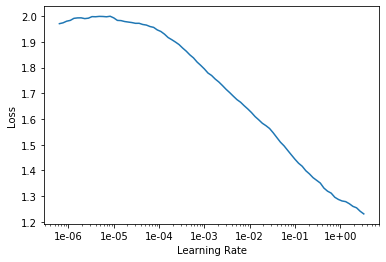

In [61]:
learn.recorder.plot()

Then we can fit the head of our network.

In [62]:
lr = 1e-2

In [63]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.661298,0.519175,0.150664,01:47
1,0.429635,0.379755,0.133899,01:49
2,0.390777,0.356100,0.127803,01:47
3,0.360274,0.332934,0.117788,01:46
4,0.357850,0.327964,0.116046,01:54


<pre>
03_1 results

epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.508273 	1.170024 	0.339911 	01:16
1 	0.471699 	0.494651 	0.166297 	01:22
2 	0.439157 	0.417086 	0.152328 	01:23
3 	0.402381 	0.370002 	0.127938 	01:23
4 	0.355355 	0.360440 	0.126608 	01:22
    </pre>

In [64]:
learn.save(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')


#### Load model

In [65]:
learn.load(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (41345 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Valid: LabelList (4593 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,irregular_metal,healthy_metal,irregular_metal
Path: data_04/train/rotated/clipped/constant/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data_04/train/rotated/clipped/constant/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, paddin

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('irregular_metal', 'healthy_metal', 187),
 ('healthy_metal', 'irregular_metal', 112),
 ('incomplete', 'irregular_metal', 56),
 ('healthy_metal', 'concrete_cement', 35),
 ('other', 'healthy_metal', 35),
 ('incomplete', 'concrete_cement', 26),
 ('concrete_cement', 'healthy_metal', 22),
 ('irregular_metal', 'concrete_cement', 18),
 ('concrete_cement', 'irregular_metal', 8),
 ('incomplete', 'healthy_metal', 7),
 ('other', 'irregular_metal', 7),
 ('irregular_metal', 'incomplete', 6),
 ('irregular_metal', 'other', 5),
 ('concrete_cement', 'incomplete', 4),
 ('other', 'concrete_cement', 3),
 ('healthy_metal', 'incomplete', 2)]

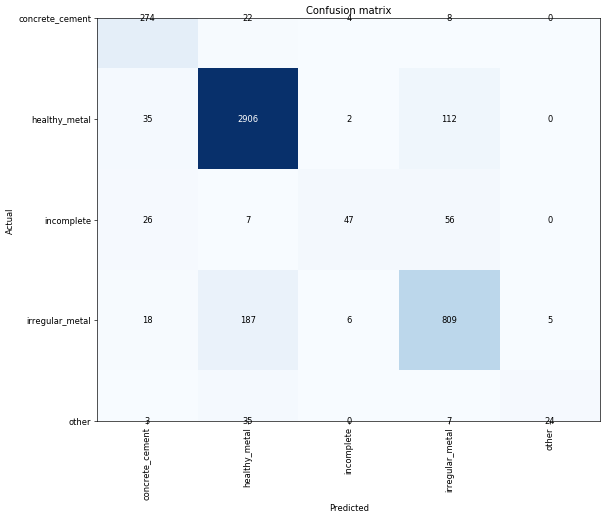

In [67]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

### Re-train

In [68]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


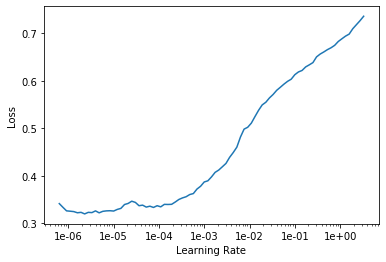

In [69]:
learn.lr_find()
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.348443,0.336107,0.120618,02:30
1,0.342969,0.316232,0.112563,02:27
2,0.304336,0.289651,0.106249,02:24
3,0.273899,0.270969,0.100370,02:23
4,0.249168,0.263890,0.092532,02:23


In [71]:
learn.save(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [72]:
learn.load(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (41345 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Valid: LabelList (4593 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,irregular_metal,healthy_metal,irregular_metal
Path: data_04/train/rotated/clipped/constant/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data_04/train/rotated/clipped/constant/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, paddin

In [73]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.299094,0.321407,0.117788,02:21
1,0.323581,0.317100,0.109732,02:22
2,0.301602,0.285570,0.105160,02:22
3,0.236548,0.245148,0.085347,02:22
4,0.201465,0.235975,0.082081,02:22


<pre>
03_1

 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.344736 	0.349004 	0.125277 	01:27
1 	0.343708 	0.355190 	0.129047 	01:15
2 	0.351904 	0.371296 	0.131042 	01:14
3 	0.346994 	0.346989 	0.123947 	01:14
4 	0.323809 	0.346372 	0.126608 	01:15
</pre>

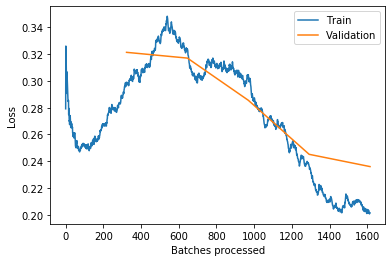

In [75]:
learn.recorder.plot_losses()

In [76]:
learn.save(f'stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [77]:
learn=learn.to_fp32()

In [78]:
learn.export(f'stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.pkl')

### inference

In [133]:
#test_images=data_dir/f'test/rotated/clipped/{img_size}'
test_dataset=ImageList.from_folder(test_images)

In [134]:
len(test_dataset)

29756

In [135]:
learn = load_learner(path=train_images, file=f'stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.pkl', test=test_dataset)

In [136]:
learn.data.loss_func

FlattenedLoss of CrossEntropyLoss()

In [137]:
type(learn.data)

fastai.vision.data.ImageDataBunch

In [138]:
type(learn.dl(DatasetType.Test))

fastai.basic_data.DeviceDataLoader

In [139]:
len(learn.dl(DatasetType.Test))

465

Get number of items in the Valid dataset (in DeviceDataLoader)

In [140]:
preds,y= learn.get_preds(ds_type=DatasetType.Test)

In [141]:
labels = np.argmax(preds, 1)

In [142]:
preds_list=[]
for pred in preds:
    preds_list.append(pred.tolist())

In [143]:
learn.data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [144]:
data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [145]:
test_predictions = [learn.data.classes[int(x)] for x in labels]

In [146]:
test_predictions[0]

'healthy_metal'

In [147]:
type(learn.data.test_ds)

fastai.data_block.LabelList

In [148]:
 learn.data.test_ds.x.items

array([PosixPath('data_04/test/rotated/clipped/constant/256/7a45b4e8_raw.tif'),
       PosixPath('data_04/test/rotated/clipped/constant/256/7a4ceccc_256_reflect.tif'),
       PosixPath('data_04/test/rotated/clipped/constant/256/7a4c079e_256_reflect.tif'),
       PosixPath('data_04/test/rotated/clipped/constant/256/7a4d84d4_raw.tif'), ...,
       PosixPath('data_04/test/rotated/clipped/constant/256/7a485590_256_wrap.tif'),
       PosixPath('data_04/test/rotated/clipped/constant/256/7a4760a4_raw.tif'),
       PosixPath('data_04/test/rotated/clipped/constant/256/7a48e7da_256_bgconstant.tif'),
       PosixPath('data_04/test/rotated/clipped/constant/256/7a4576fe_256_bgconstant.tif')], dtype=object)

In [149]:
ids=[]
for item in learn.data.test_ds.x.items:
    base, id = os.path.split(item)
    id = id.split('.tif')[0]
    ids.append(id)

In [150]:
preds_list[0]

[0.00063135294476524,
 0.9569549560546875,
 0.0009050028747878969,
 0.040434371680021286,
 0.0010744377505034208]

In [151]:
cols = learn.data.classes.copy()
cols.insert(0,'id')
df = pd.DataFrame(list(zip(ids, preds_list)), 
               columns =['id', 'pred']) 

In [152]:
pred_df = pd.DataFrame(df['pred'].values.tolist())

In [153]:
pred_df.insert(loc=0, column='id', value=ids)

In [154]:
pred_df.columns = cols

#### replace all the substrings

In [155]:
pred_df['id'] = pred_df['id'].str.replace('_raw', '')

In [156]:
pred_df['id'] = pred_df['id'].str.replace('_reflect', '')

In [157]:
pred_df['id'] = pred_df['id'].str.replace('_wrap', '')

In [158]:
pred_df['id'] = pred_df['id'].str.replace('_zoom', '')

In [159]:
pred_df['id'] = pred_df['id'].str.replace('_256', '')


In [160]:
pred_df['id'] = pred_df['id'].str.replace('_bgconstant', '')

In [161]:
pred_mean=pred_df.groupby(['id']).mean()

In [162]:
pred_mean.reset_index(inplace=True)

In [163]:
pred_mean.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a44da50,0.017067,0.980455,0.000638,0.000307,0.001533
1,7a44db72,0.002606,0.995936,0.000222,0.000517,0.000719
2,7a44dc08,0.001917,0.023874,0.038101,0.933904,0.002205
3,7a44dc80,0.002271,0.297768,0.005638,0.692850,0.001473
4,7a44dcf8,0.003509,0.494636,0.001933,0.498226,0.001696


In [164]:
pred_df=pred_mean.drop_duplicates(subset=['id'])

#### contune as per other nb's

In [165]:
pred_ids=pred_df['id'].values.tolist()

In [166]:
df_baseline = pd.read_csv(data_dir/f'submissions/mean_baseline.csv')

In [167]:
df_baseline.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.093275,0.496369,0.044923,0.352455,0.012979
1,7a4bbbd6,0.093275,0.496369,0.044923,0.352455,0.012979
2,7a4ac744,0.093275,0.496369,0.044923,0.352455,0.012979
3,7a4881fa,0.093275,0.496369,0.044923,0.352455,0.012979
4,7a4aa4a8,0.093275,0.496369,0.044923,0.352455,0.012979


In [168]:
baseline_ids=df_baseline['id'].values.tolist()

In [169]:
assert set(pred_ids)==set(baseline_ids)

#### sort by baseline ids

In [170]:
pred_df['id_cat'] = pd.Categorical(
    pred_df['id'], 
    categories=baseline_ids, 
    ordered=True
)

In [171]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
0,7a44da50,0.017067,0.980455,0.000638,0.000307,0.001533,7a44da50
1,7a44db72,0.002606,0.995936,0.000222,0.000517,0.000719,7a44db72
2,7a44dc08,0.001917,0.023874,0.038101,0.933904,0.002205,7a44dc08
3,7a44dc80,0.002271,0.297768,0.005638,0.692850,0.001473,7a44dc80
4,7a44dcf8,0.003509,0.494636,0.001933,0.498226,0.001696,7a44dcf8


In [172]:
pred_df=pred_df.sort_values('id_cat')

In [173]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
4534,7a4d630a,0.001424,0.981046,0.000972,0.014070,0.002488,7a4d630a
3506,7a4bbbd6,0.001401,0.978062,0.001085,0.018776,0.000676,7a4bbbd6
2912,7a4ac744,0.002696,0.797907,0.002200,0.195582,0.001616,7a4ac744
1625,7a4881fa,0.001070,0.082982,0.003690,0.911219,0.001040,7a4881fa
2841,7a4aa4a8,0.008109,0.447219,0.006359,0.534548,0.003765,7a4aa4a8


In [174]:
pred_df.drop(columns=['id_cat'],inplace=True)

In [175]:
assert set(pred_df.id.values.tolist())==set(baseline_ids)

In [176]:
print(f'submissions/stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv')

submissions/stage-2-2-rn50-03_27-bg_const-20191130-9cee3e20.csv


In [177]:
pred_df.to_csv(data_dir/f'submissions/stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv', index=False)

### Submission 35: 0.4563


In [92]:
arch_name = 'rn50'
pred_df=pd.read_csv(data_dir/f'submissions/stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv')

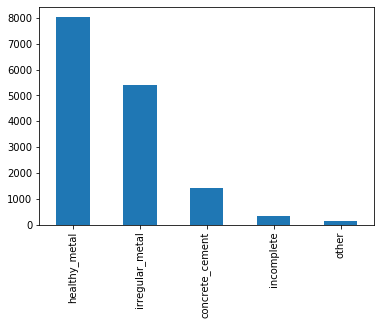

In [88]:
pred_df.drop(columns=['id'],inplace=True)
classes=pred_df.idxmax(axis=1)
pd.value_counts(classes).plot(kind="bar")